## 1.0 Data Cleaning

Read in the csv file that contains the data of the passegaers on the Titanic.  The data is stored as a dataframe named "df"

In [19]:
#import the pandas library
import pandas as pd

df = pd.read_csv("train.csv")


C:\Users\isep\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [2]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 2.0 Inspect the Data

The .info() attribute provides basic information about the data.
There are 12 variables with a maximum of 891 observations
Age (with 714 observations), Cabin (204), and embarked (889) has missing or null data

The data type are also given.  Seven of the data are of numeric types, either integers (int64) or floating (float64).  The rest are string (object).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


__***
The following are the definitions of the variables


Variable Name        Meaning and Values

Survived             0 = No, 1 = Yes 
Pclass               Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 
Sex                  Gender: male, female  
Age                  Age in years  
SibSp                # of siblings / spouses aboard the Titanic  
Parch                # of parents / children aboard the Titanic  
Ticket               Ticket number  
Fare                 Passenger fare  
Cabin                Cabin number  
Embarked             Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton 

Variable Notes

pclass: A proxy for socio-economic status (SES)
 1st = Upper
 2nd = Middle
 3rd = Lower

Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

SibSp: The dataset defines family relations in this way...
 Sibling = brother, sister, stepbrother, stepsister
 Spouse = husband, wife (mistresses and fiancés were ignored)

Parch: The dataset defines family relations in this way...
 Parent = mother, father
 Child = daughter, son, stepdaughter, stepson
 Some children travelled only with a nanny, therefore parch=0 for them.
 ***

We inspect the first few lines of data to get an idea of what they look like

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The .describe() method provides the basic statistics for only the numerical data. Though there are 12 variables, describe() outputs statistics from the seven variables with numerical inputs. The other five has string inputs and descriptive statistics are not computed. 

In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***
A simple visual boxplot can reveal a lot about our data. The plot below shows the age distribution and the class of cabin occupied. It indicates that the better class cabins are occupied by the older passengers.

50% of the age data for each Pclass are grouped in the box.

The line inside the box is the 50th percentile. The bottom line of the box is the 25th percentile. The upper line of the box is the 75th percentile.

The height of the box (75th - 25th percentile) is the interquatrile range (IQR)

The upper line (called upper whisker) is the 75th percentile + 1.5 IQR The lower line (lower whisker) is the 25th percentile - 1.5 IQR

The empty circles outside the upper and lower lines (called whiskers) are what we call outliers for the group. 

For example, for Pclass 3, there 7 passengers who are outliers (in terms of age) for the passengers who occupies the class. They are much older that those we expect to occupy that class. 
***

In [18]:
import matplotlib.pyplot as plt
df.boxplot(column='Age', by = 'Pclass')
#plt.suptitle("");

C:\Users\isep\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


[Capture.JPG](attachment:Capture.JPG)

***
We can also plot histograms to see how the data is distributed.  Below, we plot the histograms for the age and for the number of children and parents aboard the Titanic
***

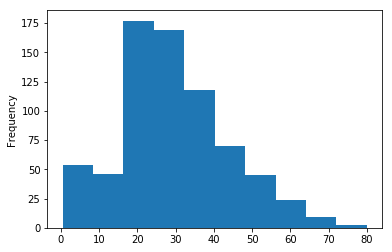

In [24]:
df.Age.plot('hist')

***
The histogram of age does not show any unusual data points (that is, less than 0 years old or more than 100 years old)
***

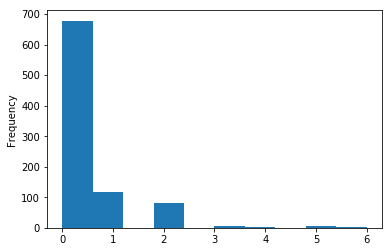

In [25]:
df.Parch.plot('hist');

In [10]:
df.Parch.plot('hist');

***
The histogram of chidlren and parents on board show that most travel without children or parent.
***

## 3.0  Duplicate Data

We want to check to make sure that no duplicates of the data exist.

Here, we do not want the same passenger to have two rows of observations.  Each passenger is identified with PassengerId so we check that there are no duplicates of values in this column.
***

In [11]:
#make a copy of original dataframe for this chcek

df_duplicateCheck = df.copy()
#create a new column.  Column will mark duplicates as True except for the first coccurence.

df_duplicateCheck["is_duplicated"]=df_duplicateCheck.duplicated('PassengerId')

#output those rows which are duplicates,i.e, where the output of the duplicate check returns True

df_duplicateCheck[df_duplicateCheck["is_duplicated"]==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_duplicated


***
The above result shows that none of the rows had a True value in "is_duplicated".  We can conclude that there is no duplicated value.

In [12]:
df_nodup = df_duplicateCheck.loc[df_duplicateCheck["is_duplicated"]==False]


In [15]:
df_nodup  = df_duplicateCheck.drop_duplicates(subset=None, keep='first', inplace=False)
df_nodup

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_duplicated
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,False


If there are duplicated values, we can create a new dataframe that contains no duplicate value as below.
***

In [27]:
df_nodup = df_duplicateCheck.loc[df_duplicateCheck["is_duplicated"]==False]

In [28]:
df_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              714 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Ticket           891 non-null object
Fare             891 non-null float64
Cabin            204 non-null object
Embarked         889 non-null object
is_duplicated    891 non-null bool
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 91.4+ KB


***
df_nodup has the same number of PassgengerId as the original dataframe df.  This is consistent with the evidence that there were no duplicates.
***

## 4.0  Missing Data

### 4.1 Dropping Missing Data

We create a new dataframe named df1 in which all rows with any NaN values are dropped. 

The .copy() method applied creates df1 as a new dataframe copy of df with the NaN rows dropped rather than just a pointer pointing to the same location as df. 

This is an important point when you want to manipulate the data in df1. 

These are rows where Age, Cabin, or embarked has NaN values. Note that we end up with only 183 observations that has all the columns of complete data. 

This way of deleting rows may not be ideal as we are throwing away data that are useful. 

Let's say, we are not concerned about the missing data in cabin and embarked as we do not think they are related to the probability of survival that we want to predict. Not having data in those columns are not critical at all.  So we do not have to delete rows where data are missing from these two columns.



In [29]:
df1 = df.dropna().copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    183 non-null int64
Survived       183 non-null int64
Pclass         183 non-null int64
Name           183 non-null object
Sex            183 non-null object
Age            183 non-null float64
SibSp          183 non-null int64
Parch          183 non-null int64
Ticket         183 non-null object
Fare           183 non-null float64
Cabin          183 non-null object
Embarked       183 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [30]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


***
We think that a passenger's age may help explain whether he survive.  Sicne this is an important data, we will drop rows where the Age data is missing.

We do this by using the "subset" parameter.
***

In [31]:
df_noMissingAge = df.dropna(subset=['Age']).copy()
df_noMissingAge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


***
In the above command, we only drop rows where the Age has missing data.  It resulted in 714 rows with non-missing data in Age.  

Note that the rows with missing data in Cabin anbd embarked are still kept, if that row has Age data that is not missing.
***

In [32]:
df_noMissingAge.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***
We note that Cabin has a large number of missing data.  The variable has only 204 non-missing data.  In our opinion, cabin cannot help us explain survival probablility, so we decide to drop the whole cabin column.

The parameter "axis" can take values of 0 or 1.  O refers to row whilst 1 refers to column.  The default is 0, and since we are using the non-default value of 1, we must include the parameter explicitly.  
***

In [33]:
df_dropCabin = df_noMissingAge.drop('Cabin',axis=1).copy()
df_dropCabin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


###  4.2 Replacing Missing Data with Default Values

A number of rows with missing Age data are extracted below to show the effetc of replacing missing data with a default value.

We use average of age as the default value for illustration.

In [34]:
df.loc[[0,5,17,19,26],['Name','Age']]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
5,"Moran, Mr. James",NaN
17,"Williams, Mr. Charles Eugene",NaN
19,"Masselmani, Mrs. Fatima",NaN
26,"Emir, Mr. Farred Chehab",NaN


***
The command to use to replace missing value is the .fillna command.  In this case, we use the mean() as the default.
***

In [35]:
df_AgeMissingAv = df.copy()
df_AgeMissingAv.Age = df.Age.fillna(df.Age.mean())
df_AgeMissingAv.loc[[0,5,17,19,26],['Name','Age']]


,Name,Age
0,"Braund, Mr. Owen Harris",22.000000
5,"Moran, Mr. James",29.699118
17,"Williams, Mr. Charles Eugene",29.699118
19,"Masselmani, Mrs. Fatima",29.699118
26,"Emir, Mr. Farred Chehab",29.699118


## 5.0 Renaming Columns

In [36]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


***
Sometimes the column headings read in from the databse given may not be easy to understand.  This is illustrated above.  

"SibSp" and "Parch" are diffiult to understand at first glance.

You can rename the columns to increase the understanding with the .rename() method.

The inplace=True operation makes changes within the current dataframe, that is df_noMissingAge. 

The default is inplace = False.

If you wish to maintain the current dataframe as is and have the changes copied to a new dataframe, then use inplace=False - this is a defualt value and you can ignore the inplace parameter.
***

In [37]:
df_noMissingAge.rename(columns={'SibSp':'Siblings', 'Parch':'ParentChild'},inplace=True)
df_noMissingAge.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings,ParentChild,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 6.0  Reformatting Data

In [21]:
#import pandas
import pandas as pd

#read in data from excel
#read in only 3 columns that we are interested in
stuns = pd.read_excel("2015 Reported Taser Data.xlsx")[["Incident Case Number","Height","Weight","Date of Incident", "Time of Incident"]]


There are 69 columns in the EXCEL file.  We are only interested in the three columns, "Incident Case Number", "Height" and "Weight".  We explicitly read in only those columns and ignore the other unwanted columns.
That saves us the trouble of dropping the unwanted columns from our dataframe later on.

In [22]:
stuns.head()

,Incident Case Number,Height,Weight,Date of Incident,Time of Incident
0,NaN,NaN,NaN,NaT,NaN
1,2015-055,"5'10""",220,2015-01-01,15:13:00
2,15-19,"5'8""",150,2015-01-01,03:48:00
3,15-00010,"5'10""",175,2015-01-01,00:32:00
4,1500006763,"5'10""",150,2015-01-04,11:41:00


***
Use the .info() method to find out the datatype we have read in.  Only "Incident Case Number" and "Date of Incident" are of the correct datatypes.  The rest are all listed as objects (strings) but they are not.

"Height" and "Weight" should be numeric while "Time of Incident" should be datetime64[ns]
***

In [23]:
stuns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 5 columns):
Incident Case Number    610 non-null object
Height                  609 non-null object
Weight                  608 non-null object
Date of Incident        610 non-null datetime64[ns]
Time of Incident        609 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 23.9+ KB


***
Change the dataype of "Weight" to numeric type using the pd.to_numeric method.  
Note that we set the parameter **errors='coerce'**
What does it do?

Note in the cell below that there are some entries in the "Weight" column that does not look like numbers.  Row 41 has "Unknown".  When the pd.to_numeric method encouters these non-number type of data, errors will be raised and execution of the program halted.  Setting the parameter **errors='coerce'** will set those data that cannot be converted to NaN )
***

In [24]:
stuns["Weight"].iloc[35:45]

35        226
36        150
37        175
38        175
39        290
40        180
41    Unknown
42        130
43        200
44        210
Name: Weight, dtype: object

In [25]:
stuns["Weight"] = pd.to_numeric(stuns["Weight"], errors = 'coerce')
stuns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 5 columns):
Incident Case Number    610 non-null object
Height                  609 non-null object
Weight                  556 non-null float64
Date of Incident        610 non-null datetime64[ns]
Time of Incident        609 non-null object
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 23.9+ KB


***
Next we convert the "Time of Incident" to a datetime64[ns] format by using the pd.to_datetime command.

Here we see that the original data is in the following format: 15:13:00
Hours(24hour):Minutes:Seconds

We must makes sure the conversion follows the same format.  Hence the argument format='%H:%M:%S is used.

The website http://strftime.org has a list of date and time formats for reference
***

In [26]:
from datetime import datetime
stuns['incidentTime'] = pd.to_datetime(stuns['Time of Incident'], format='%H:%M:%S',errors='coerce' )
stuns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 6 columns):
Incident Case Number    610 non-null object
Height                  609 non-null object
Weight                  556 non-null float64
Date of Incident        610 non-null datetime64[ns]
Time of Incident        609 non-null object
incidentTime            608 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 28.7+ KB


***
We want to convert the height from feet and inches (in string format) to height in inches (in numberic format).

The current format for height is  5' 11".

Could be 5" 11 or 5" 

We need to find a pattern that matches these patterns, extract the numbers and identify them as feet and inches.

Then convert them to inches.
 

We use the regular expression to search for the pattern that we want.

Documentation for the regular expression in python is found in https://docs.python.org/3/howto/regex.html

We should look for a pattern like this:

1.  something that starts with a number.  An empty string would not match. (the + at the end of the pattern [0-9]+ means that we are looking for a number with 1 or more numbers, not zero)

2.  Put the first numbers we find in one group that we name "feet" (?P<feet> defines the group to put the first set of number in).  This is the "feet" position of the height

3.  Then find the ' that denotes the expression for feet.  We are not using it so we do not capture it. Follwoing that we have \s* to allow for spaces between the feet and inches data (could be no space).  

4.  Then look for the inches part of the data.  There could be three possibilities.

    i.  there is no inches (a blank)
    ii. there is the regular inches data followed by "
    iii. there is the regular inches data but not followed by "
   
   First ?P<inches> code defines the group named "inches" to capture the inches data.
    
   Second, the pattern [0-9]{0,2}? matches numbers from exactly 0 up to 2 digits for the inches but not more (the ? constrains it to that).
   
   Then look for either " or nothing (" is optional) before the end of the string (\Z).  Other than the optional ", there should be nothing (other than space which is taken care of by \s between the numbers representing the inches and the end of the string.
***

In [27]:
import re


def inches(ht):
     
    try: 
        #        result = re.match(r"(?P<feet>[0-9]+)'(?P<inches>[0-9]{0,2}?)[\"]?\Z", ht)
        result = re.match(r"(?P<feet>[0-9]+)'\s*(?P<inches>[0-9]{0,2}?)[\"]?\s*\Z", ht)
        # Access the extract values using the .group() method
        feet = int(result.group("feet"))
        if result.group("inches") == "":
            inches = 0
        else:
            inches = int(result.group("inches"))
    
        
    except:
        # This code will only be called if the code within the try: block
        # throws an exception
        return None

    # We won't get to this point unless the code in the try block was successful
    #return prime_str

    # Convert feet and inches to inches
    #feet = result.group("feet")
    #inches = result.group("inches")
    return feet * 12 + inches

***
We test the function to see that it works
***

In [28]:
ht = "5'10\"   "
inches(ht)

70

In [29]:
ht = "5'10   "
inches(ht)

70

In [30]:
ht = "5'10 hello   "
inches(ht)

***
We apply the function to convert "Height" from string to numeric.  We put the converted figure in a new column named "Heights_numeric"
***

In [31]:
stuns['Heights_numeric'] = stuns['Height'].apply(inches)
stuns.head(10)

,Incident Case Number,Height,Weight,Date of Incident,Time of Incident,incidentTime,Heights_numeric
0,NaN,NaN,NaN,NaT,NaN,NaT,NaN
1,2015-055,"5'10""",220.0,2015-01-01,15:13:00,1900-01-01 15:13:00,70.0
2,15-19,"5'8""",150.0,2015-01-01,03:48:00,1900-01-01 03:48:00,68.0
3,15-00010,"5'10""",175.0,2015-01-01,00:32:00,1900-01-01 00:32:00,70.0
4,1500006763,"5'10""",150.0,2015-01-04,11:41:00,1900-01-01 11:41:00,70.0
5,2015-0379,6',153.0,2015-01-05,12:52:00,1900-01-01 12:52:00,72.0
6,2015-341,"5'8""",260.0,2015-01-06,18:07:00,1900-01-01 18:07:00,68.0
7,15-16-AR,"6'2""",200.0,2015-01-06,23:54:00,1900-01-01 23:54:00,74.0
8,1500001035,"5'10""",177.0,2015-01-07,09:00:00,1900-01-01 09:00:00,70.0
9,15-000071,"5'2""",120.0,2015-01-08,10:18:00,1900-01-01 10:18:00,62.0


***
Note in the column incidentTime which was converted from Time of Incident (a string) to the datetime64[ns] format.  Unfortunately, the conversion inserts some date data into it.  We can get rid of the date data through various ways.

One method is illustrated below.

Unfortunately all such methods convert the datetime64[ns] data back to the string format. 
***

In [32]:
s=stuns["incidentTime"].dt.strftime('%H:%M:%S')
s.head()

0         NaT
1    15:13:00
2    03:48:00
3    00:32:00
4    11:41:00
Name: incidentTime, dtype: object